# Valuation Package - Prototype

In [42]:
#Importing Packages
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
import random
import matplotlib.pyplot as plt
from mortgage import Loan

In [43]:
## Object to Simulate Proformas

class Real_Estate_Proforma():
    #Initial Variables
    def __init__(self, rent=2000, periods=10 , Vacancy_correction=[0,0.0833,0.1248,0.1666,0.2496],probability_vacancy=(70, 10, 10, 5,5)):
        self.rent =[rent]
        self.periods = periods
        self.Vacancy_correction=Vacancy_correction
        self.probability_vacancy=probability_vacancy
        self.Rent_projection=[]
        self.op_expenses=[]
        self.property_value=[]
        self.appreciation=[]
        self.NPV=[]
        self.Cum_Sum_NPV=[]
        self.loan_projection=[]
    #Rent Projection
    def rent_projection(self, mean_rent_growth=0.04 ,sd_rent_growth=0.01):
        Rent_projection=[self.rent[0]*12]
        for i in range(0,self.periods-1):
            rent_growth=np.random.normal(mean_rent_growth, sd_rent_growth,1)
            Vacancy_choice=random.choices(self.Vacancy_correction,weights=self.probability_vacancy, k=1)
            Next_Rent=(Rent_projection[-1]*(1+rent_growth[0])*(1-Vacancy_choice[0]))
            Rent_projection.append(Next_Rent)
        self.Rent_projection=Rent_projection
    #Rent Projection - List
    def rent_projection_list(self):
        return self.Rent_projection
    #Operational Expenses
    def op_cost_forecast(self,mean_op_cost=0.40,std_op_cost=0.01):
        op_expenses=[]
        for i in self.Rent_projection:
            Percentage_of_Gross_Rent=np.random.normal(mean_op_cost, std_op_cost,1)
            op_cost=i*Percentage_of_Gross_Rent[0]
            op_expenses.append(op_cost) 
        self.op_expenses=op_expenses
    #Operational Expenses - List
    def op_cost_forecast_list(self):
        return self.op_expenses
    #Property Appreciation
    def property_appreciation(self,initial_value=500000,Downpayment_percentage=0.3,interest=.0289 ,term_years=25,mean_appreciation=0.03,std_appreciation=0.6):
        property_value=[initial_value]
        loan = Loan(principal=initial_value*(1-Downpayment_percentage), interest=interest, term=term_years)
        self.loan_projection = loan
        Property_Appreciation=[]
        for i in range(0,self.periods):
            Appreciation=np.random.normal(mean_appreciation, std_appreciation,1)
            Next_Value_Home=(property_value[-1]*(1+Appreciation[0]))
            property_value.append(Next_Value_Home)
        end_year_property_value=property_value[1:]
        self.property_value=end_year_property_value
        #It is important to substract the value of the initial downpayment to calculate the real appreciation and what is being payed by the tenant
        for i in range(0,len(end_year_property_value)):
            period_appreciation=(end_year_property_value[i]-property_value[i])
            Property_Appreciation.append(period_appreciation)
        self.appreciation=Property_Appreciation
    #Property Value - List
    def property_value_list(self):
        return self.property_value
    #Property Appreciation - List
    def property_appreciation_list(self):
        return self.appreciation
    #NPV
    def calculate_NPV(self,mean_inflation=0.03, std_inflation=0.01):
        NPV=[]
        Cum_Sum_NPV=[]
        inflation=np.random.normal(mean_inflation, std_inflation,1)
        #NPV takes into accound my rent projection, my op.expense, the expenses made during the year in interest and what I earned from appreciation and capital payments
        for i in range(0,self.periods):
            #NPV_Period=(self.Rent_projection[i] - self.op_expenses[i]- (int(self.loan_projection.schedule()[12*(i+1)][4]-self.loan_projection.schedule()[12*(i)][4])) - (int(self.loan_projection.schedule()[12*(i+1)][5])-int(self.loan_projection.schedule()[12*(i)][5])) + self.appreciation[i])/(1+inflation)**(i)
            NPV_Period=(self.Rent_projection[i] - self.op_expenses[i]-(int(self.loan_projection.schedule()[12*(i+1)][4]-self.loan_projection.schedule()[12*(i)][4])) - (int(self.loan_projection.schedule()[12*(i)][5])-int(self.loan_projection.schedule()[12*(i+1)][5]))+self.appreciation[i])/(1+inflation)**(i)
            NPV.append(NPV_Period)
        self.NPV=NPV
        Cum_Sum_NPV=(np.cumsum(NPV))
        self.Cum_Sum_NPV=Cum_Sum_NPV
    #NPV  List
    def NPV_list(self):
        return self.NPV
    #Cum Sum NPV - List
    def Cum_Sum_NPV_list(self):
        return self.Cum_Sum_NPV

In [66]:
#Variables for configurations
simulations=1
#Paramenters
Projection_Len=10
Initial_rent=1300
mean_rent_growth=0.05
sd_rent_growth=0.01
mean_op_cost=0.50
std_op_cost=0.20
initial_value=250000
Downpayment_percentage=0.1
interest=.0289
loan_term_years=15
mean_appreciation=0.03
std_appreciation=0.1
mean_inflation=0.04 
std_inflation=0.03

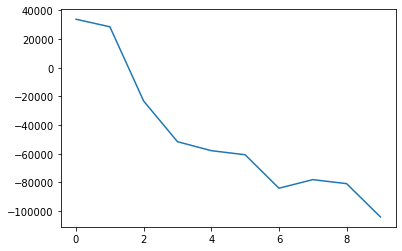

In [67]:
#Loops of Simulations
scenarios=[]
for i in range(simulations):
    My_building=Real_Estate_Proforma(rent=Initial_rent,periods=Projection_Len)
    My_building.rent_projection( mean_rent_growth=mean_rent_growth ,sd_rent_growth=sd_rent_growth)
    My_building.op_cost_forecast(mean_op_cost=mean_op_cost,std_op_cost=std_op_cost)
    My_building.property_appreciation(initial_value=initial_value,Downpayment_percentage=Downpayment_percentage,interest=interest ,term_years=loan_term_years,mean_appreciation=mean_appreciation,std_appreciation=std_appreciation)
    My_building.calculate_NPV(mean_inflation=mean_inflation, std_inflation=std_inflation)
    scenarios.append(My_building.Cum_Sum_NPV_list())  
#Graph
Graph_Periods=list(range(0,Projection_Len))
for i in range(0,len(scenarios)):
    label="Line"+"_"+str(i)
    plt.plot(Graph_Periods,scenarios[i], label =label, linestyle="-")
plt.show()     

#property_value_list(self)
#property_appreciation_list()

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-104090.19850117, -104090.09850117, -104089.99850117,
        -104089.89850117, -104089.79850117, -104089.69850117,
        -104089.59850117, -104089.49850117, -104089.39850117,
        -104089.29850117, -104089.19850117]),
 <BarContainer object of 10 artists>)

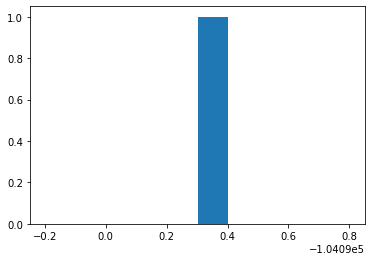

In [68]:
#Histogram of final NPV
Final_NPV=[]
for i in range(0,len(scenarios)):
    NPV=scenarios[i][-1]
    Final_NPV.append(NPV)
    
counts, bins=np.histogram(Final_NPV)
plt.hist(bins[:-1], bins=bins, weights=counts)

In [69]:
#Cash-on-Cash per annum return
Cash_on_Cash =((sum(Final_NPV)/len(Final_NPV))/(initial_value*Downpayment_percentage))**(1/Projection_Len)-1
Cash_on_Cash
#print('Avg. Cash-on-Cash per annum return of this investment is ' + str(round(Cash_on_Cash*100,2)) +'%' )

<ipython-input-69-b0ba69f942c5>:2: RuntimeWarning: invalid value encountered in double_scalars
  Cash_on_Cash =((sum(Final_NPV)/len(Final_NPV))/(initial_value*Downpayment_percentage))**(1/Projection_Len)-1


nan

In [62]:
Median_Cash_on_Cash=(np.median(Final_NPV)/(initial_value*Downpayment_percentage))**(1/Projection_Len)-1
print('Median. Cash-on-Cash per annum return of this investment is ' + str(round(Median_Cash_on_Cash*100,2)) +'%' )

Median. Cash-on-Cash per annum return of this investment is nan%


<ipython-input-62-c0689a5161db>:1: RuntimeWarning: invalid value encountered in double_scalars
  Median_Cash_on_Cash=(np.median(Final_NPV)/(initial_value*Downpayment_percentage))**(1/Projection_Len)-1
